In [1]:
#pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

In [24]:
model = models.Sequential()

In [26]:
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))

C:\Users\Sanika_almale\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.add(layers.Dropout(0.5))

In [30]:
model.add(layers.Dense(512, activation='relu'))

In [32]:
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.2001 - loss: 2.1938 - val_accuracy: 0.2714 - val_loss: 1.9321
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.2621 - loss: 1.9704 - val_accuracy: 0.3031 - val_loss: 1.9116
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2696 - loss: 1.9520 - val_accuracy: 0.3306 - val_loss: 1.9092
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.2862 - loss: 1.9270 - val_accuracy: 0.3300 - val_loss: 1.8948
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.2903 - loss: 1.9101 - val_accuracy: 0.3497 - val_loss: 1.8640
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3045 - loss: 1.8805 - val_accuracy: 0.3526 - val_loss: 1.8994
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.3070 - loss: 1.8590 - val_accuracy: 0.3578 - val_loss: 1.8570
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3173 - loss: 1.8485 - 

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3897 - loss: 1.8291
Test accuracy: 0.3885999917984009


In [14]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

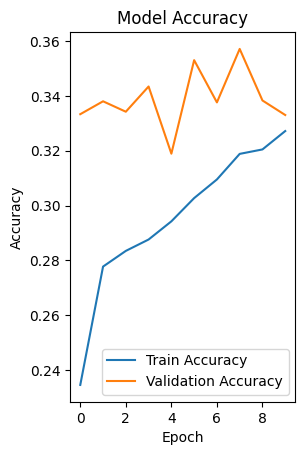

In [15]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

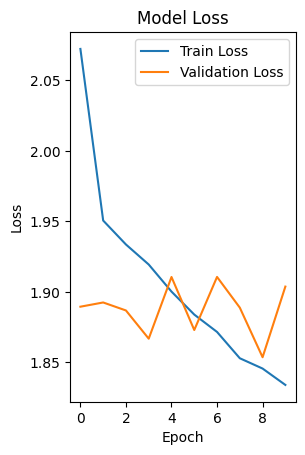

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
num_images = 5
test_images = x_test[:num_images].reshape(num_images, 32, 32, 3)  # Reshape back to 32x32x3
predictions = model.predict(x_test[:num_images])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


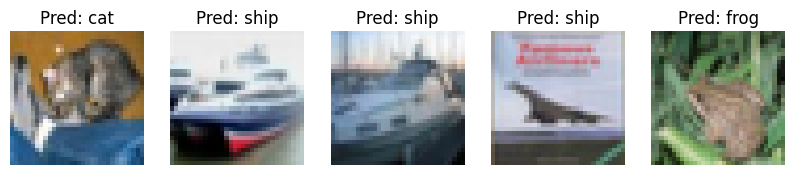

In [20]:
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.show()